In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
 用户id,时间戳,浏览行为数据,浏览子行为编号
"""
names = ['userid','time','browser_behavior','browser_behavior_number']
browse_history_train = pd.read_csv("../../pcredit/train/browse_history_train.txt",header=None)
browse_history_test = pd.read_csv("../../pcredit/test/browse_history_test.txt",header=None)

browse_history = pd.concat([browse_history_train,browse_history_test])
browse_history.columns = names
browse_history.head()

,userid,time,browser_behavior,browser_behavior_number
0,34801,5926003545,173,1
1,34801,5926003545,164,4
2,34801,5926003545,38,7
3,34801,5926003545,45,1
4,34801,5926003545,110,7


In [2]:
browse_history['browse_count'] = 1
browse_history.head()

,userid,time,browser_behavior,browser_behavior_number,browse_count
0,34801,5926003545,173,1,1
1,34801,5926003545,164,4,1
2,34801,5926003545,38,7,1
3,34801,5926003545,45,1,1
4,34801,5926003545,110,7,1


In [9]:
browse_time = browse_history[['userid','time','browse_count']]
browse_time_n = pd.pivot_table(browse_time,index=['userid','time'],values=['browse_count'],aggfunc=sum)
browse_time_n.head()

browse_count
userid time                    
2      5893397864           105
       5893398099           195
       5893756769           300
       5894351819           300
       5907360322           180

In [37]:
# 对不同的时间记录条数进行统计
browse_time_n_1 = browse_time_n.copy()
browse_time_n_1['browser_time_n'] = 1
browse_time_n_1.drop(['browse_count'],axis=1,inplace=True)
#browse_time_n_1.head()

browse_time_n_1_sum = browse_time_n_1.sum(level='userid')
browse_time_n_1_sum.columns = ['browse_time_n_1_sum']
browse_time_n_1_sum.head()

,browse_time_n_1_sum
userid,
2,6
3,6
4,5
6,3
7,5


In [23]:
# browser_behavior_mean browse_time_mean
browse_time_mean = browse_time_n.mean(level='userid')
browse_time_mean.columns = ['browse_time_mean']
browse_time_mean.head()

,browse_time_mean
userid,
2,217.5
3,57.0
4,72.8
6,5.0
7,201.6


In [25]:
browser_behavior = browse_history[['userid','browser_behavior','browse_count']]
browser_behavior.head()

,userid,browser_behavior,browse_count
0,34801,173,1
1,34801,164,1
2,34801,38,1
3,34801,45,1
4,34801,110,1


In [26]:
browser_behavior_g = pd.pivot_table(browser_behavior,index=['userid','browser_behavior'],values=['browse_count'],aggfunc=sum)
browser_behavior_g.head()

browse_count
userid browser_behavior              
2      7                           30
       25                          30
       31                          30
       38                          75
       41                          30

In [27]:
browser_behavior_mean = browser_behavior_g.mean(level='userid')
browser_behavior_mean.columns = ['browser_behavior_mean']
browser_behavior_mean.head()

,browser_behavior_mean
userid,
2,54.375000
3,22.800000
4,21.411765
6,15.000000
7,32.516129


In [5]:
browser_behavior_count = browser_behavior_g.unstack()
browser_behavior_count.columns = [ 'behavior#{}'.format(i) for i in range(1,217)]
browser_behavior_count = browser_behavior_count.fillna(0)
browser_behavior_count.head()

,behavior#1,behavior#2,behavior#3,behavior#4,behavior#5,behavior#6,behavior#7,behavior#8,behavior#9,behavior#10,...,behavior#207,behavior#208,behavior#209,behavior#210,behavior#211,behavior#212,behavior#213,behavior#214,behavior#215,behavior#216
userid,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0


In [7]:
#browser_behavior_count.apply(max)
#  筛选方差大于 0.1 的列
cols = []
for col in browser_behavior_count.columns:
    if browser_behavior_count[col].values.var()>5:
        cols.append(col)
print len(cols)

78


In [31]:
'''
a = pd.Series(range(100,1000))
a = pd.cut(a,20,labels=[ i for i in range(1,21)])
a
'''

'\na = pd.Series(range(100,1000))\na = pd.cut(a,20,labels=[ i for i in range(1,21)])\na\n'

In [8]:
# 对方差大于 100 的列进行离散化
browser_behavior_count_01 = browser_behavior_count[cols]
for col in browser_behavior_count_01.columns:
    if browser_behavior_count_01[col].values.var()>100:
        browser_behavior_count_01[col] = pd.cut(browser_behavior_count_01[col],20,labels=[ i for i in range(1,21)])
browser_behavior_count_01.head()

/home/hadoop/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,behavior#7,behavior#10,behavior#12,behavior#13,behavior#15,behavior#20,behavior#23,behavior#25,behavior#28,behavior#31,...,behavior#190,behavior#193,behavior#194,behavior#195,behavior#197,behavior#200,behavior#201,behavior#207,behavior#210,behavior#213
userid,,,,,,,,,,,,,,,,,,,,,
2,30.0,0.0,0.0,0.0,0.0,0.0,1,30.0,1,1,...,2,30.0,0.0,0.0,0.0,0.0,1,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1,...,1,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1,...,1,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1
6,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1,...,1,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1
7,0.0,0.0,0.0,0.0,14.0,0.0,1,0.0,1,1,...,1,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1


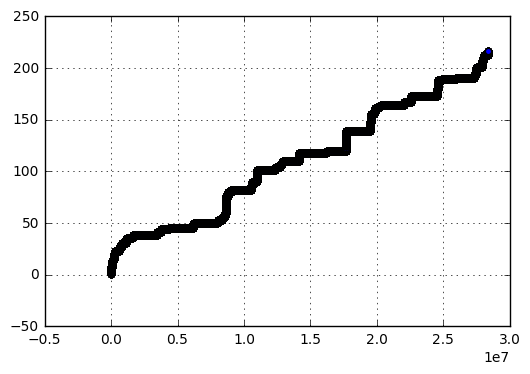

In [7]:
browser_behavior1 = browse_history['browser_behavior'].sort_values()
nn = range(len(browser_behavior1))
plt.scatter(nn,browser_behavior1)
plt.grid(True)
plt.show()

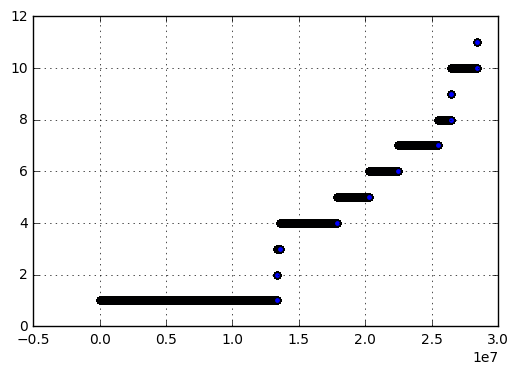

In [6]:
browser_behavior_number = browse_history['browser_behavior_number'].sort_values()
nn = range(len(browser_behavior_number))
plt.scatter(nn,browser_behavior_number)
plt.grid(True)
plt.show()

In [3]:
#  1) 统计 browser_behavior_number 每个类别的次数
browse_history['count'] = np.ones(len(browse_history['browser_behavior_number'])) # 添加数据进行统计
browser_behavior_count = pd.pivot_table(browse_history,index=['userid','browser_behavior_number'],values=['count'],aggfunc=np.sum)
browser_behavior_count.head()

count
userid browser_behavior_number       
2      1                        540.0
       3                         90.0
       4                        150.0
       5                        105.0
       6                        135.0

In [28]:
browser_behavior_count_mean = browser_behavior_count.mean(level='userid')
browser_behavior_count_mean.columns = ['browser_behavior_count_mean']
browser_behavior_count_mean.head()

,browser_behavior_count_mean
userid,
2,163.125
3,57.000
4,45.500
6,15.000
7,144.000


In [4]:
browser_behavior_number_count = browser_behavior_count.unstack()
browser_behavior_number_count = browser_behavior_number_count.fillna(0)
browser_behavior_number_count.columns = [ "count#{}".format(i) for i in range(1,12)]
browser_behavior_number_count.head()

,count#1,count#2,count#3,count#4,count#5,count#6,count#7,count#8,count#9,count#10,count#11
userid,,,,,,,,,,,
2,540.0,0.0,90.0,150.0,105.0,135.0,105.0,105.0,0.0,75.0,0.0
3,174.0,0.0,0.0,48.0,30.0,24.0,42.0,0.0,0.0,24.0,0.0
4,164.0,0.0,4.0,64.0,36.0,32.0,36.0,4.0,0.0,24.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
7,462.0,0.0,0.0,140.0,98.0,98.0,112.0,14.0,0.0,84.0,0.0


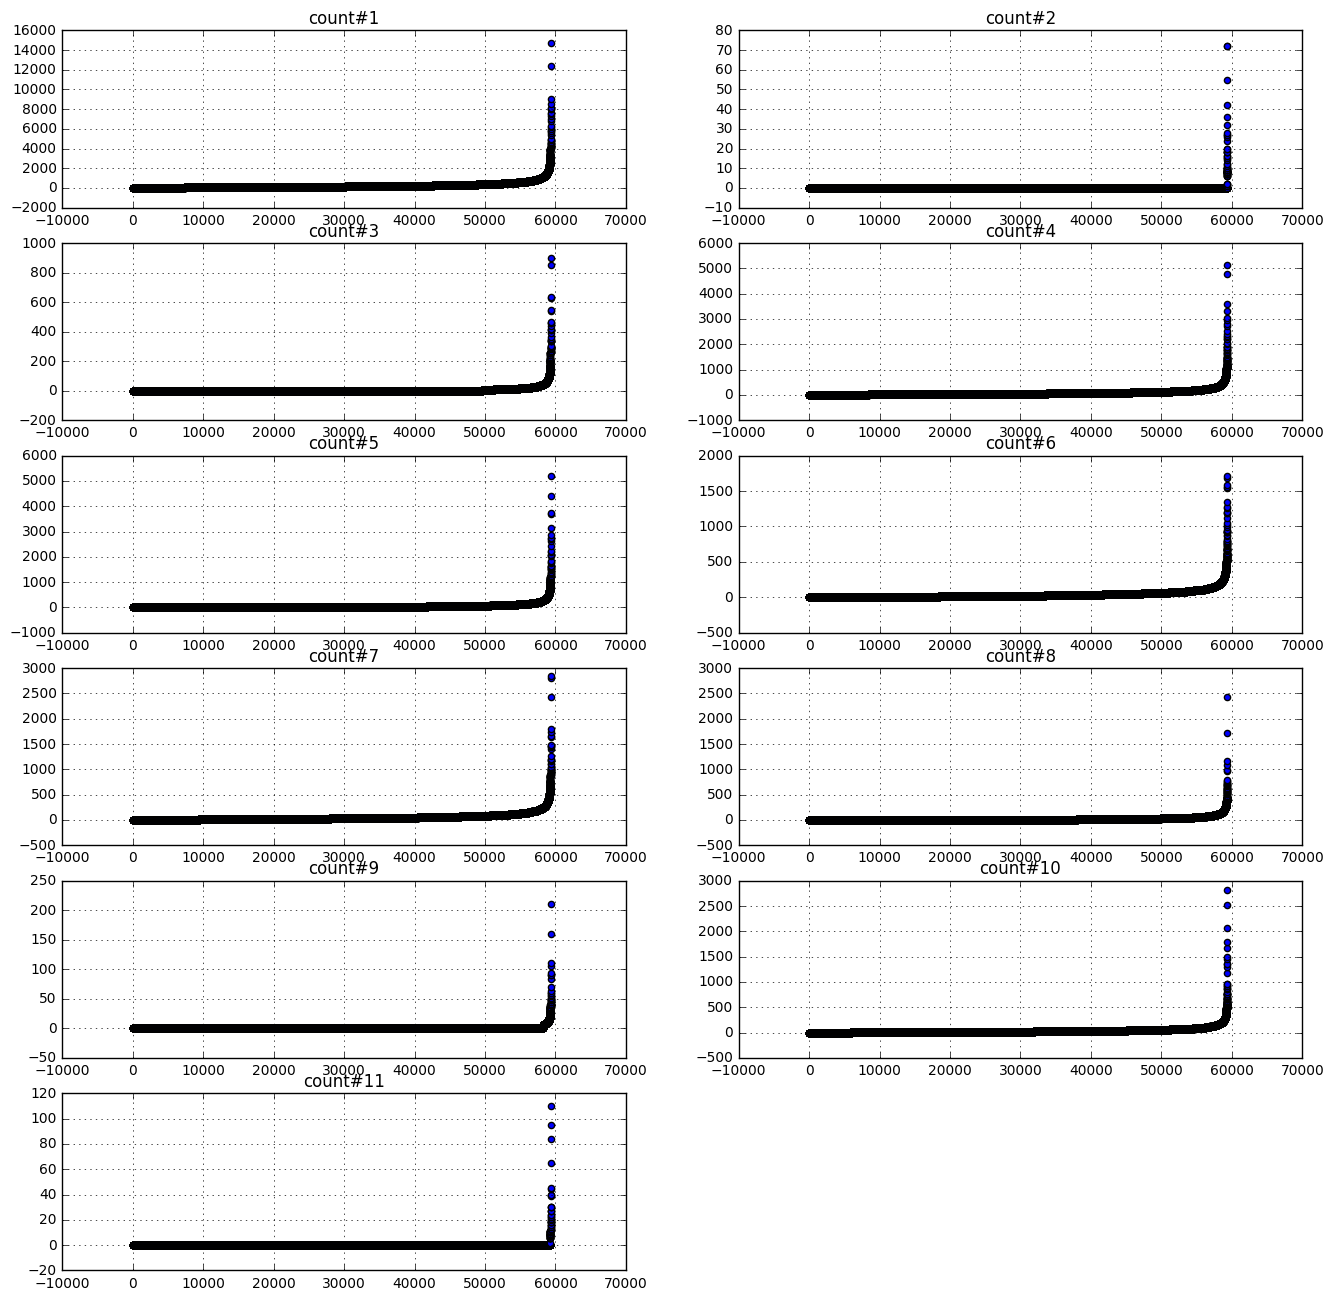

In [5]:
plt.figure(figsize=(16,16))
nn = range(len(browser_behavior_number_count))
for i in range(1,12):
    plt.subplot(6,2,i)
    col = "count#{}".format(i)
    data = browser_behavior_number_count[col].sort_values()
    plt.title(col)
    plt.grid(True)
    plt.scatter(nn,data)
plt.show()

In [6]:
# 对 browser_behavior_number_count 列 进行 离散化,先删除 2,9,11 列
browser_behavior_number_count.drop(['count#2','count#9','count#11'],axis=1,inplace=True)
for col in browser_behavior_number_count.columns:
    browser_behavior_number_count[col] = pd.cut(browser_behavior_number_count[col],20,labels=[ i for i in range(1,21)])
browser_behavior_number_count.head()

,count#1,count#3,count#4,count#5,count#6,count#7,count#8,count#10
userid,,,,,,,,
2,1,3,1,1,2,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1
7,1,1,1,1,2,1,1,1


In [7]:
#  添加一个含有 browser 数据的标志
browser_behavior_number_count['browser_tag'] = 1
browser_behavior_number_count.head()

,count#1,count#3,count#4,count#5,count#6,count#7,count#8,count#10,browser_tag
userid,,,,,,,,,
2,1,3,1,1,2,1,1,1,1
3,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1
7,1,1,1,1,2,1,1,1,1


In [38]:
browser_data = browser_behavior_number_count.join([browse_time_n_1_sum,browser_behavior_count_mean,browser_behavior_mean,browse_time_mean])
browser_data.head()

,count#1,count#3,count#4,count#5,count#6,count#7,count#8,count#10,browser_tag,browse_time_n_1_sum,browser_behavior_count_mean,browser_behavior_mean,browse_time_mean
userid,,,,,,,,,,,,,
2,1,3,1,1,2,1,1,1,1,6,163.125,54.375000,217.5
3,1,1,1,1,1,1,1,1,1,6,57.000,22.800000,57.0
4,1,1,1,1,1,1,1,1,1,5,45.500,21.411765,72.8
6,1,1,1,1,1,1,1,1,1,3,15.000,15.000000,5.0
7,1,1,1,1,2,1,1,1,1,5,144.000,32.516129,201.6


In [39]:
browser_data.to_csv('../data/train/browse_history.csv')

In [4]:
# 这里采用计算每个用户总浏览行为次数进行聚合
browse_history_count = browse_history.loc[:, ['userid', 'browser_behavior']].groupby(['userid']).sum()
browse_history_count.head()

,browser_behavior
userid,
2,151500
3,38586
4,38764
6,1650
7,112420


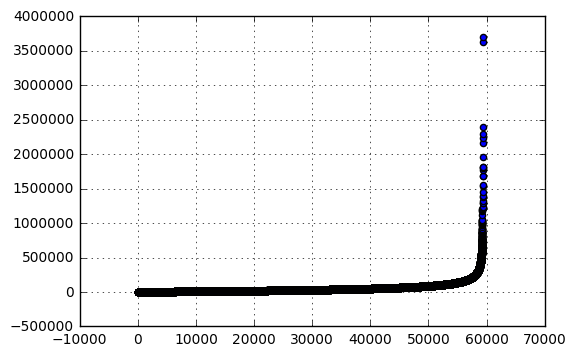

In [5]:
browser_behavior = browse_history_count['browser_behavior'].sort_values()
nn = range(len(browser_behavior))
plt.scatter(nn,browser_behavior)
plt.grid(True)
plt.show()